# Dot 1

In this Dotto we will use one of Seaborn’s conveniently available datasets about the Titanic, which I’m sure many readers have seen before. Seaborn has quite a few datasets ready to be loaded into Python to practice with; they are great for practicing data processing, exploration, and basic machine learning techniques. This data set is great because it has a decent number of entries — almost 900 — while also having an interesting story to dig into. There are lots of questions to ask and relationships between variables to explore making it a great example data set. Most critical for this article is that there is also a good mix of numerical and categorical variables to explore.

In this Dotto we will see:

In this Dotto we will see

- **Categorical Distribution Plots**

  We have two different kinds of categorical distribution plots, box plots and violin plots. These kinds of plots allow us to choose a numerical variable, like age, and plot the distribution of age for each category in a selected categorical variable.

- **Categorical Estimate Plot**

- **Categorical Scatter Plots**

  Both strip plots and swarm plots are essentially scatter plots where one variable is categorical. I like to use them as additions to other kinds of plots, which we’ll discuss as they are useful for quickly visualizing the number of data points in a group.

In [8]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Dot 2

# Box Plots

Many of us have probably made quite a few box plots over the years. They are an easy and effective way to visualize groups of numerical data through their quartiles. Seaborn makes creating attractive box plots simple and allows us to easily compare an extra dimension with the hue argument that appears in many Seaborn functions.

**Basic Boxplot**

Lets take a look at distribution of age by passenger class. We can see that age tends to decrease as you go down in passenger class. That makes sense, young people tend to travel on a budget.

**Adding Hue**

Like many other plots available in Seaborn, box plots can take an added `hue` argument to add another variable for comparison. Adding the hue shows us that regardless of class the age of passengers that survived was generally lower than those who passed away. Having the `hue` for additional comparison allows this box plot to be quite information dense. The more complex the plot gets the longer it will take for viewers to comprehend it, but it is nice to have the option when interesting insights are more easily shown with an added dimension.

Text(0.5, 1.0, 'Age by Passenger Class, Titanic')

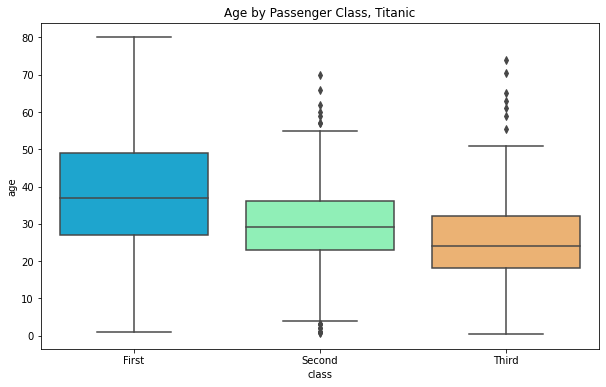

In [20]:
# Basic Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=titanic, palette='rainbow')
plt.title("Age by Passenger Class, Titanic")

Text(0.5, 1.0, 'Age by Passenger Class, Separated by Survival')

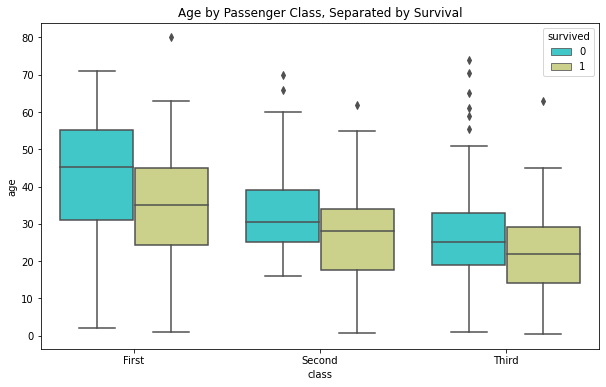

In [19]:
# Adding Hue

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=titanic, palette='rainbow', hue='survived')
plt.title("Age by Passenger Class, Separated by Survival")

# Dot 3

# Violin Plots

Violin plots are not very frequently used but I have found them to be useful on occasion, and they are an interesting change from more popular options. They plot a vertical kernel density plot for each category and a small box plot to summarize important statistics.

While I like this plot, I think it is easier to compare the genders with slightly different formatting: When we split the violin on the hue it is a lot easier to see the differences in each KDE. However, the IQR stats aren’t split by the sex anymore; instead they apply to the entire class. So there are trade-offs to styling your plot in certain ways.

Text(0.5, 1.0, 'Violin Plot of Age by Class, Separated by Sex')

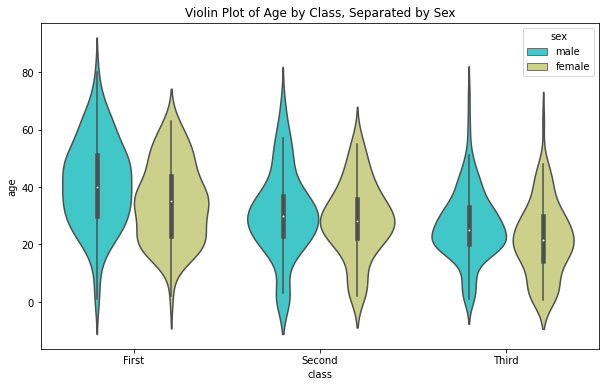

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class',y="age",data=titanic, hue='sex', palette='rainbow')
plt.title("Violin Plot of Age by Class, Separated by Sex")

Text(0.5, 1.0, 'Violin Plot of Age by Class, Separated by Sex')

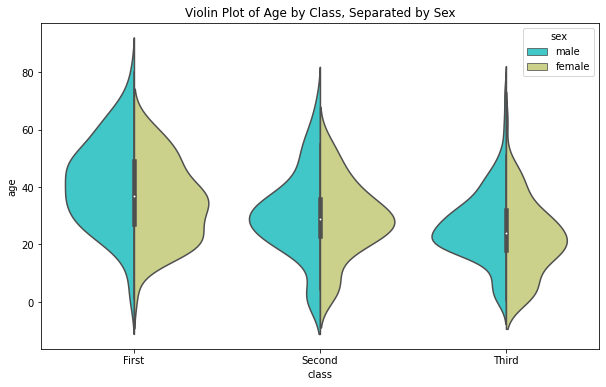

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y="age", data=titanic, hue='sex', split='True', palette='rainbow')
plt.title("Violin Plot of Age by Class, Separated by Sex")

# Dot 4

# Boxen Plot

The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000). It is similar to a traditional box plot, however it essentially just plots more quantiles. With more quantiles, we can see more info about the distribution shape beyond the central 50% of the data; this extra detail is especially present in the tails, where box plots tend to give limited information.

Just in case there still isn’t enough going on here for you, we can also add a `hue` to a boxen plot! We can see that the boxen plot gives us much more information beyond the central 50% of the data. However, keep in mind that boxen plots are meant for larger data sets with entries between 10,000 and 100,000. This data set of under 1,000 entries is definitely not ideal. Here is a [link]((https://vita.had.co.nz/papers/letter-value-plot.html)) to the paper where boxen plots were created that explains them very well.

Text(0.5, 1.0, 'Distribution of Age by Passenger Class')

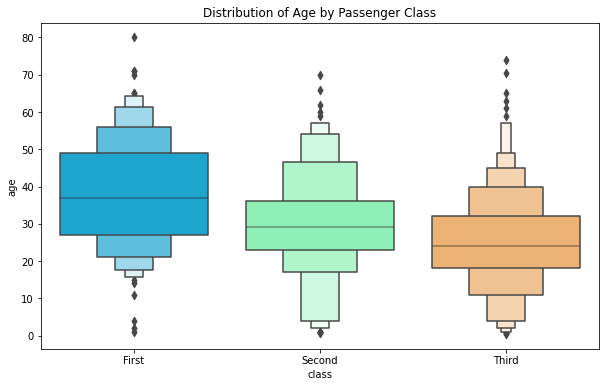

In [22]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='class', y='age', data=titanic, palette='rainbow')
plt.title("Distribution of Age by Passenger Class")

Text(0.5, 1.0, 'Distribution of Age by Passenger Class, Separated by Survival')

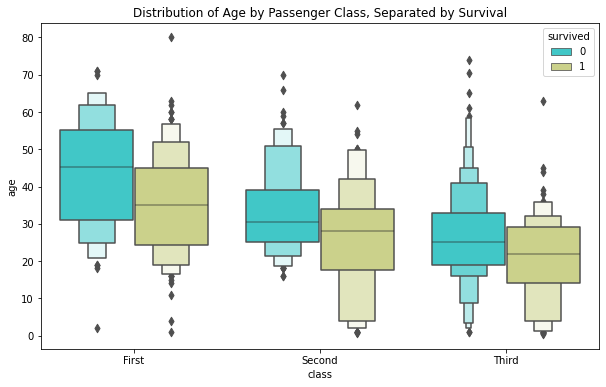

In [23]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='class', y='age', data=titanic, palette='rainbow', hue='survived')
plt.title("Distribution of Age by Passenger Class, Separated by Survival")

# Dot 5

# Bar Plot

Bar plots are classic. You get an estimate of central tendency for a numerical variable for each class on the x axis. Say we were interested in knowing the average fare price of passengers that embarked from different towns. 

Seaborn will take the mean as default, but you can use other measures of central tendency as well. There is a noticeable difference between Cherbourg and the other two, let’s separate the bars by class to see who was boarding in each town.

Now we can see that the average fare price in Cherbourg was so high due to some very expensive first class tickets. The large error bar on the fare price in first class from Cherbourg is also interesting; that could mean there is a lot of separation between some very high price outlier tickets and the rest. 



Text(0.5, 1.0, 'Fare of Passenger by Embarked Town')

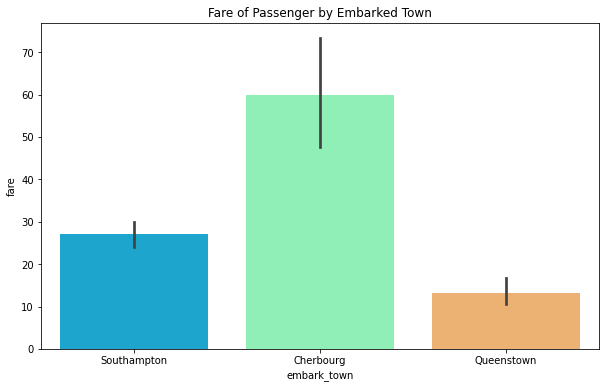

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='embark_town', y='fare', data=titanic, palette='rainbow')
plt.title("Fare of Passenger by Embarked Town")

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town, Divided by Class')

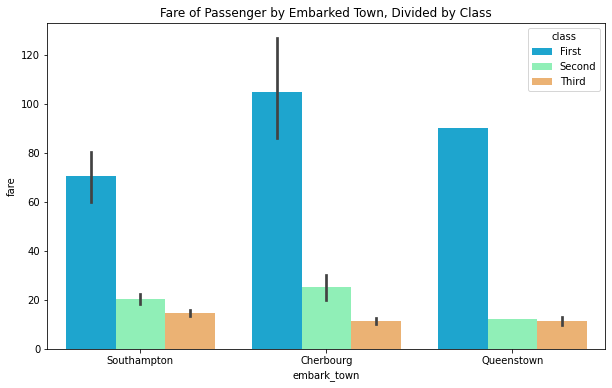

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='embark_town', y='fare', data=titanic, palette='rainbow', hue='class')
plt.title("Fare of Passenger by Embarked Town, Divided by Class")

# Dot 6

# Point Plot

Point plots convey the same information as a bar plot with a different style. They can be good for overlaying with different plots since they have a smaller footprint in the space.


Text(0.5, 1.0, 'Average Fare Price by Embarked Town')

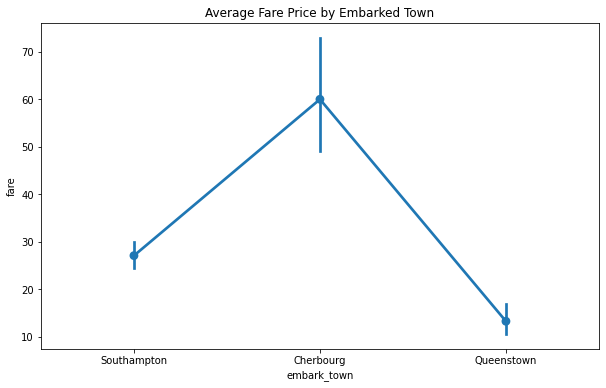

In [26]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='embark_town',y='fare',data=titanic)
plt.title("Average Fare Price by Embarked Town")

Text(0.5, 1.0, 'Average Fare Price by Embarked Town, Separated by Sex')

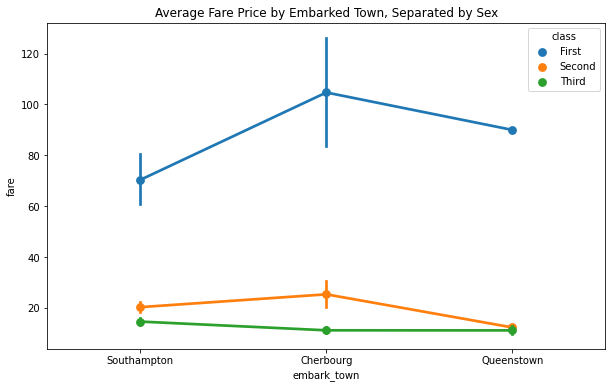

In [27]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='embark_town', y='fare', data=titanic, hue='class')
plt.title("Average Fare Price by Embarked Town, Separated by Sex")

# Dot 7

# Count Plot

Count Plots are essentially histograms across a categorical variable. They take all the same arguments as bar plots in Seaborn, which helps keep things simple.


Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

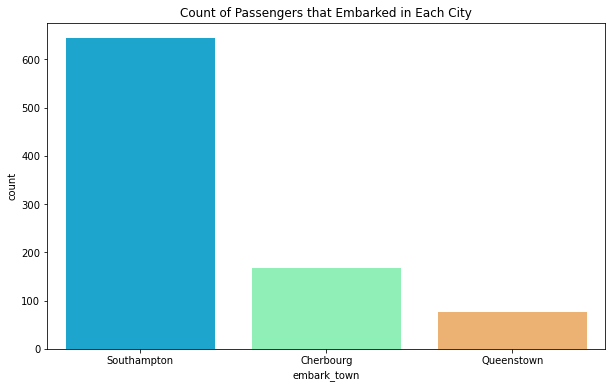

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='embark_town', data=titanic, palette='rainbow')
plt.title("Count of Passengers that Embarked in Each City")

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City, Separated by Sex')

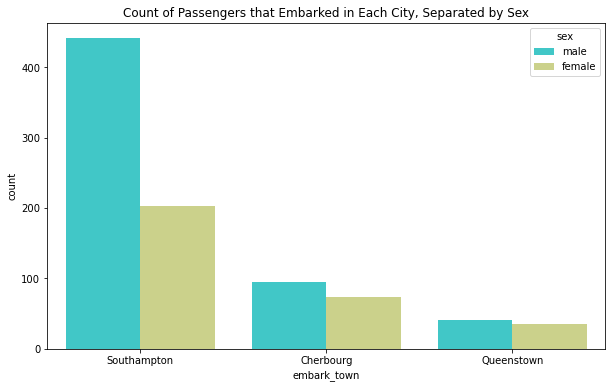

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='embark_town', data=titanic, palette='rainbow', hue='sex')
plt.title("Count of Passengers that Embarked in Each City, Separated by Sex")

# Dot 8

# Strip Plot

Draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

I don’t love the way strip plots look when you have a lot of data points. But swarm plots might make this a little more useful. Strip plots can look great with less data points and they can convey really interesting attributes of your data since they don’t hide details behind aggregation.

<AxesSubplot:xlabel='class', ylabel='age'>

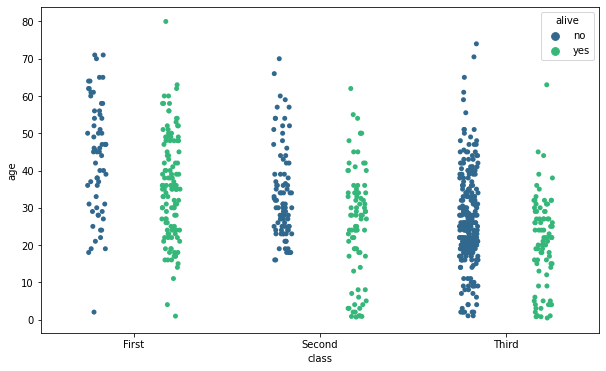

In [31]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='class', y='age', data=titanic, jitter=True, hue='alive', dodge=True, palette='viridis')

# Dot 9

# Swarm Plot

Swarm plots are fantastic because they offer an easy way to show the individual data points in a distribution. Instead of a big blob like the strip plot, the swarm plot simply adjusts the points along the x-axis. Although they also don’t scale well with tons of values, they offer more organized insight.

 Here we can more easily see where the dense age groups are rather than the difficult to interpret strip plot above.



C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age by Passenger Class, Separated by Survival')

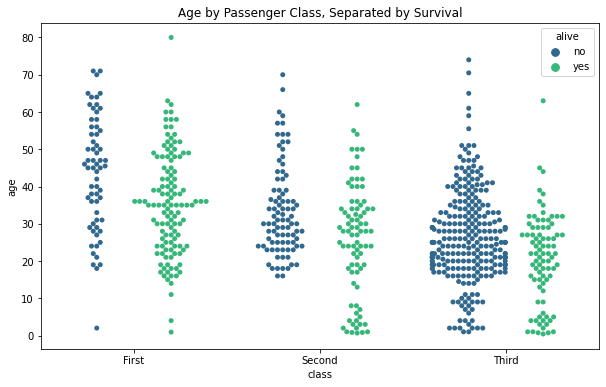

In [32]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='class', y='age', data=titanic, hue='alive', dodge=True, palette='viridis')
plt.title("Age by Passenger Class, Separated by Survival")